# Utkarsh vataliya

# cifar10 dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
from tensorflow.keras.datasets import cifar10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

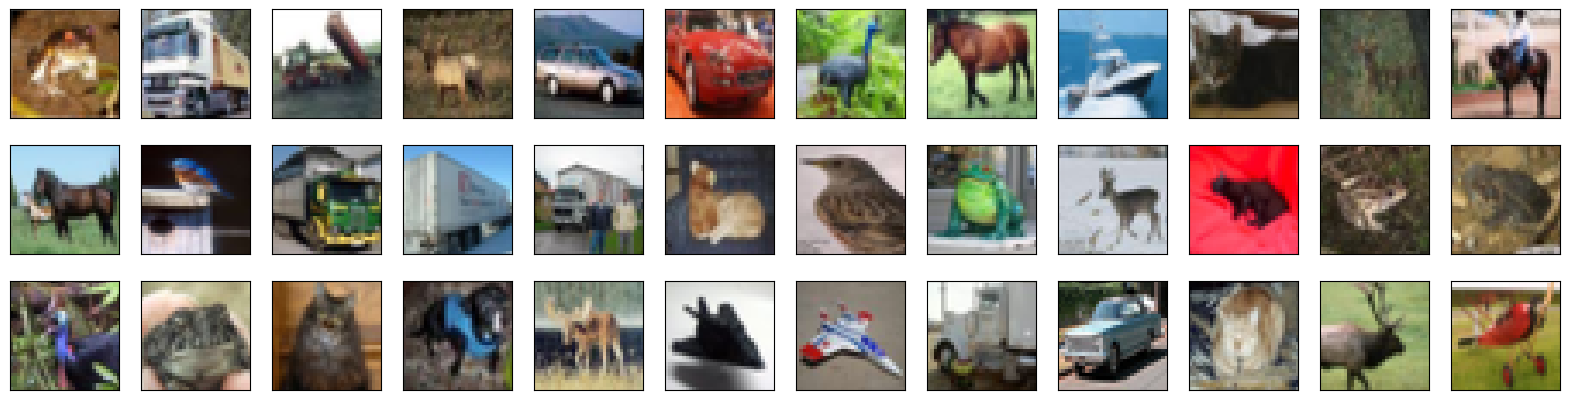

In [3]:
fig = plt.figure(figsize=(20,5))
for i in range(36):
    ax = fig.add_subplot(3, 12, i + 1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(x_train[i]))

In [4]:
x_train = x_train.astype('float32')/255
x_test = x_test.astype('float32')/255

In [5]:
from keras.utils import np_utils
from tensorflow import keras

# one-hot encode the labels
num_classes = len(np.unique(y_train))
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

# break training set into training and validation sets
(x_train, x_valid) = x_train[5000:], x_train[:5000]
(y_train, y_valid) = y_train[5000:], y_train[:5000]

# print shape of training set
print('x_train shape:', x_train.shape)

# print number of training, validation, and test images
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')
print(x_valid.shape[0], 'validation samples')

x_train shape: (45000, 32, 32, 3)
45000 train samples
10000 test samples
5000 validation samples


In [6]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model = Sequential()

model.add(Conv2D(64, (5,5), padding='same', activation='relu', input_shape=(32,32,3)))
model.add(Conv2D(128, (3,3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))

model.add(Conv2D(128, (3,3), padding='same', activation='relu'))
model.add(Conv2D(128, (3,3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(128, (3,3), padding='same', activation='relu'))
model.add(Conv2D(128, (3,3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 64)        4864      
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 128)       73856     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 128)      0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 16, 16, 128)       147584    
                                                                 
 conv2d_3 (Conv2D)           (None, 16, 16, 128)       147584    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 8, 8, 128)        0         
 2D)                                                    

In [7]:
model.compile(loss=tf.keras.losses.binary_crossentropy , optimizer='adam', metrics=['accuracy'])

In [8]:
datagen = ImageDataGenerator(
    horizontal_flip=True,
    channel_shift_range=0.05,
    rotation_range=10,
    validation_split=0.15
)

In [9]:
early_stopping = keras.callbacks.EarlyStopping(monitor='loss',patience=10)

training_flow = datagen.flow(x_train, y_train, subset='training')
validation_flow = datagen.flow(x_train, y_train, subset='validation', shuffle=False)

history = model.fit(x_train, y_train,
                    validation_data=(x_valid, y_valid),
                    callbacks=[early_stopping],
                    epochs=30)

Epoch 1/30
1407/1407 [==============================] - 28s 14ms/step - loss: 0.2570 - accuracy: 0.3671 - val_loss: 0.2102 - val_accuracy: 0.5074
Epoch 2/30
1407/1407 [==============================] - 15s 10ms/step - loss: 0.1840 - accuracy: 0.5890 - val_loss: 0.1672 - val_accuracy: 0.6340
Epoch 3/30
1407/1407 [==============================] - 15s 10ms/step - loss: 0.1455 - accuracy: 0.6876 - val_loss: 0.1412 - val_accuracy: 0.6950
Epoch 4/30
1407/1407 [==============================] - 17s 12ms/step - loss: 0.1226 - accuracy: 0.7439 - val_loss: 0.1271 - val_accuracy: 0.7348
Epoch 5/30
1407/1407 [==============================] - 19s 13ms/step - loss: 0.1057 - accuracy: 0.7825 - val_loss: 0.1224 - val_accuracy: 0.7422
Epoch 6/30
1407/1407 [==============================] - 15s 10ms/step - loss: 0.0916 - accuracy: 0.8128 - val_loss: 0.1218 - val_accuracy: 0.7602
Epoch 7/30
1407/1407 [==============================] - 15s 11ms/step - loss: 0.0789 - accuracy: 0.8411 - val_loss: 0.1269 -

In [10]:
y_hat = model.predict(x_test)

cifar10_labels = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

313/313 [==============================] - 1s 4ms/step


1407/1407 [==============================] - 6s 5ms/step - loss: 0.0101 - accuracy: 0.9839
Test Accuracy : 98.39%


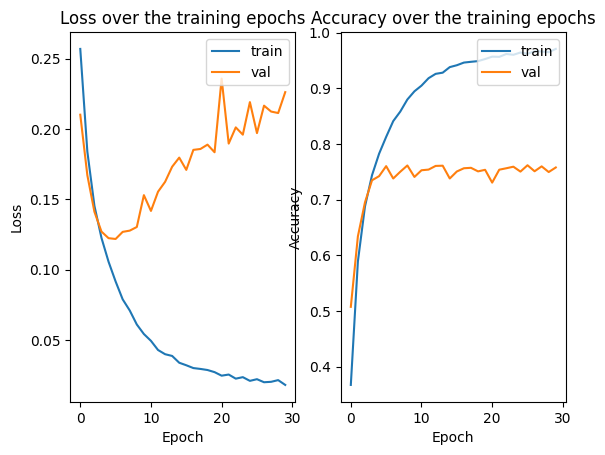

In [11]:
evaluation = model.evaluate(x_train, y_train)
print(f'Test Accuracy : {evaluation[1] * 100:.2f}%')

train_metrics = history.history

fig, ax = plt.subplots(1,2)
ax[0].plot(train_metrics['loss'])
ax[0].plot(train_metrics['val_loss'])
ax[0].legend(['train','val'], loc='upper right')
ax[0].set_xlabel("Epoch")
ax[0].set_ylabel("Loss")
ax[0].set_title("Loss over the training epochs")

ax[1].plot(train_metrics['accuracy'])
ax[1].plot(train_metrics['val_accuracy'])
ax[1].legend(['train','val'], loc='upper right')
ax[1].set_xlabel("Epoch")
ax[1].set_ylabel("Accuracy")
ax[1].set_title("Accuracy over the training epochs")

plt.show()

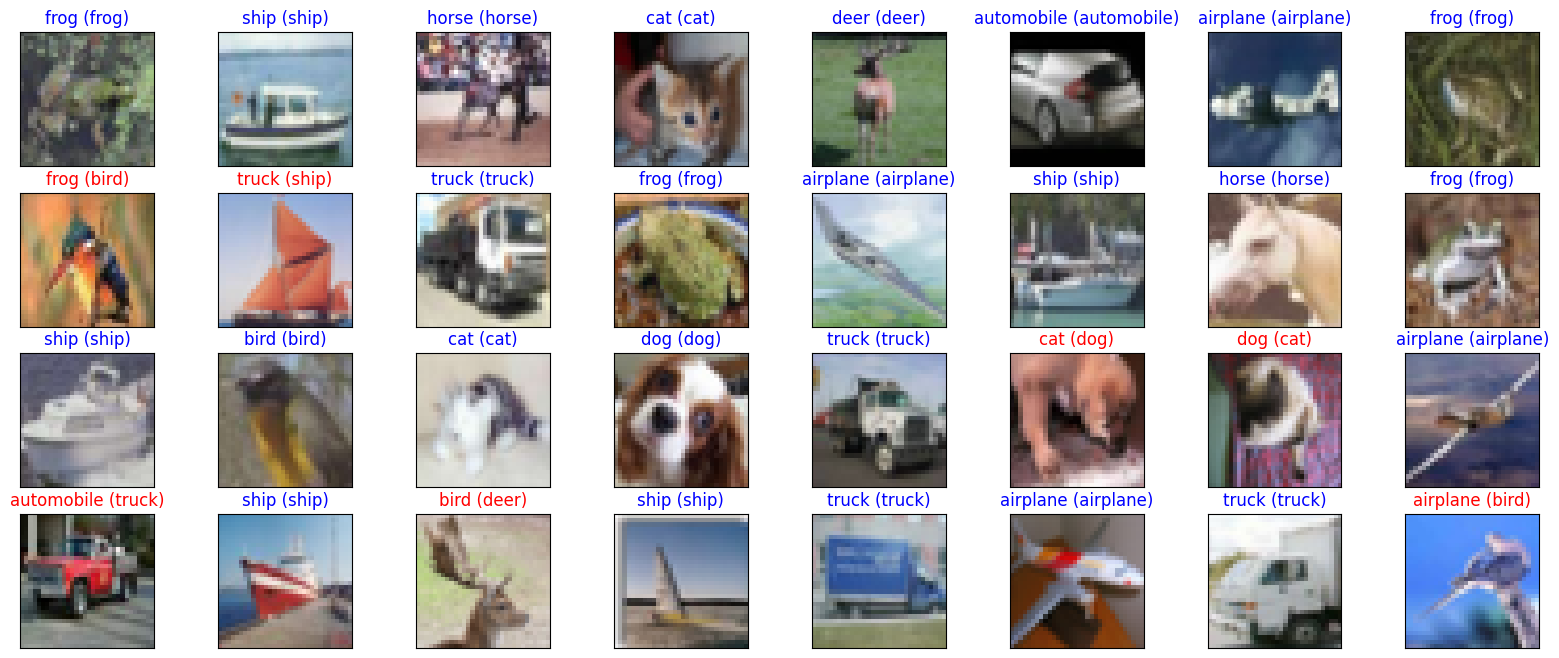

In [12]:
fig = plt.figure(figsize=(20, 8))
for i, idx in enumerate(np.random.choice(x_test.shape[0], size=32, replace=False)):
    ax = fig.add_subplot(4, 8, i + 1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(x_test[idx]))
    pred_idx = np.argmax(y_hat[idx])
    true_idx = np.argmax(y_test[idx])
    ax.set_title("{} ({})".format(cifar10_labels[pred_idx], cifar10_labels[true_idx]),
                 color=("blue" if pred_idx == true_idx else "red"))

# oxflower17

In [14]:
import tflearn.datasets.oxflower17 as oxflower17
x, y = oxflower17.load_data()

Instructions for updating:
non-resource variables are not supported in the long term


100.0% 60276736 / 60270631


Succesfully downloaded 17flowers.tgz 60270631 bytes.
File Extracted
Starting to parse images...
Parsing Done!


In [15]:
print(f'x shape :{x.shape}')
print(f'y shape :{y.shape}')

x shape :(1360, 224, 224, 3)
y shape :(1360,)


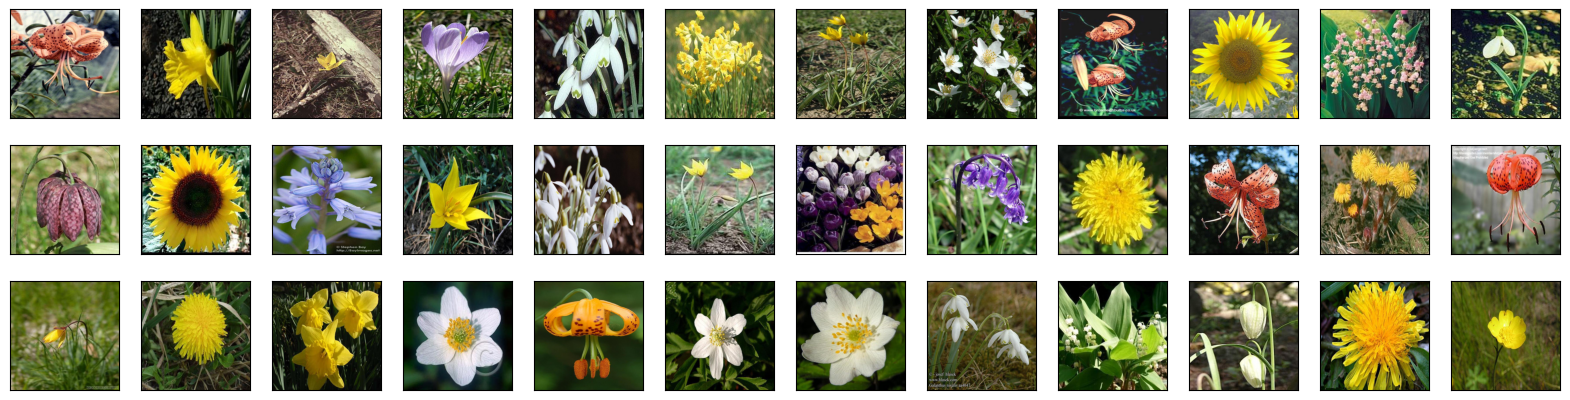

In [16]:
import matplotlib.pyplot as plt
%matplotlib inline
fig = plt.figure(figsize=(20,5))
for i in range(36):
    ax = fig.add_subplot(3, 12, i + 1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(x[i]))

In [17]:
from keras.utils import to_categorical

x, y = oxflower17.load_data()

x_train = x.astype('float32') / 255.0
y_train = to_categorical(y, num_classes=17)

In [20]:
from tensorflow import keras
from keras.applications.vgg16 import VGG16, preprocess_input
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten

In [21]:
# Set the path to your training and validation data
train_data_dir = '/content/train'
validation_data_dir = '/content/validation'

In [22]:
num_train_samples = 2000
num_validation_samples = 800
epochs = 5
batch_size = 16

In [23]:
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

58889256/58889256 [==============================] - 3s 0us/step


In [24]:
for layer in base_model.layers:
    layer.trainable = False

In [25]:
model = Sequential()

model.add(base_model)
model.add(Flatten())
model.add(Dense(120, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

In [26]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [29]:
train_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)
validation_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)

train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(224, 224),
    batch_size=batch_size,
    class_mode='binary')

validation_generator = validation_datagen.flow_from_directory(
    validation_data_dir,
    target_size=(224, 224),
    batch_size=batch_size,
    class_mode='binary')

# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=num_train_samples // batch_size,
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=num_validation_samples // batch_size)

Found 337 images belonging to 2 classes.
Found 59 images belonging to 2 classes.
Epoch 1/5
125/125 [==============================] - 16s 128ms/step - batch: 62.0000 - size: 15.2800 - loss: 0.0523 - acc: 0.9979 - val_loss: 2.2560 - val_acc: 0.9324
Epoch 2/5
125/125 [==============================] - 15s 119ms/step - batch: 62.0000 - size: 15.4000 - loss: 0.1071 - acc: 0.9964 - val_loss: 1.1128 - val_acc: 0.9824
Epoch 3/5
125/125 [==============================] - 15s 119ms/step - batch: 62.0000 - size: 15.2800 - loss: 0.5838 - acc: 0.9958 - val_loss: 1.2842 - val_acc: 0.9838
Epoch 4/5
125/125 [==============================] - 14s 116ms/step - batch: 62.0000 - size: 15.4000 - loss: 0.1989 - acc: 0.9958 - val_loss: 3.3230 - val_acc: 0.9500
Epoch 5/5
125/125 [==============================] - 16s 128ms/step - batch: 62.0000 - size: 15.1600 - loss: 0.1044 - acc: 0.9984 - val_loss: 4.5714 - val_acc: 0.9500


In [30]:
print('training acc :',history.history['acc'][-1],'\n','test acc:', (history.history['val_acc'])[-1])

training acc : 0.9984169006347656 
 test acc: 0.949999988079071


<Axes: >

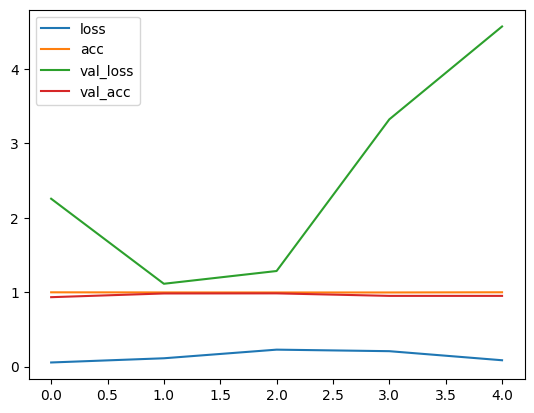

In [33]:
pd.DataFrame(history.history).plot()